In [1]:
from autograph import autograph
import matplotlib.pyplot as plt

def draw_adjacency_matrix(
    graph: autograph.KnowledgeGraph,
    title: str
):
    matrix = graph.as_matrix()
    plt.imshow(matrix, cmap="Greys", interpolation="none")
    plt.title(title)
    plt.show()

Added scale free clusters
Added links


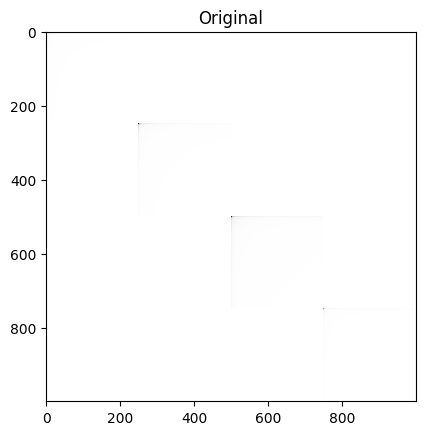

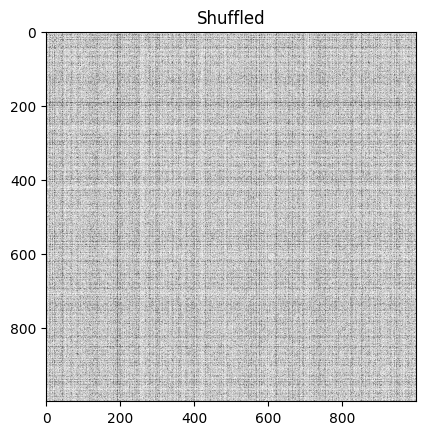

Clustering
Running on 0..400000
Running on 0..99994
Running on 101478..400000
Running on 101478..200719
Running on 201491..400000
Running on 201491..300546
Running on 300753..400000


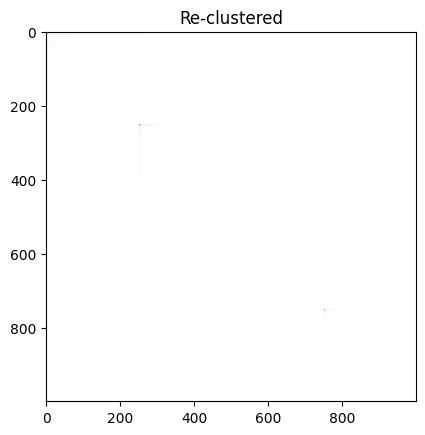

[(0, 100003), (100003, 200004), (200004, 300003), (300003, 400000)]


In [2]:
builder = autograph.GraphBuilder(0)
builder.add_scale_free_cluster(100_000, 100)
builder.add_scale_free_cluster(100_000, 150)
builder.add_scale_free_cluster(100_000, 250)
builder.add_scale_free_cluster(100_000, 50)

print("Added scale free clusters")

for _ in range(1_000):
    builder.add_random_link(0, 1)
    builder.add_random_link(1, 2)
    builder.add_random_link(2, 3)

print("Added links")

graph = builder.finalize_graph()
draw_adjacency_matrix(graph, "Original")

graph.shuffle_vertex_ids(0)
draw_adjacency_matrix(graph, "Shuffled")

print("Clustering")

graph.cluster(0.01, 5, 0.1, 100)
draw_adjacency_matrix(graph, "Re-clustered")

print(graph.get_clusters())